In [5]:
from collections import defaultdict
import polars as pl
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pl.read_csv("../../Data/Titanic/advancedDataframe.csv")

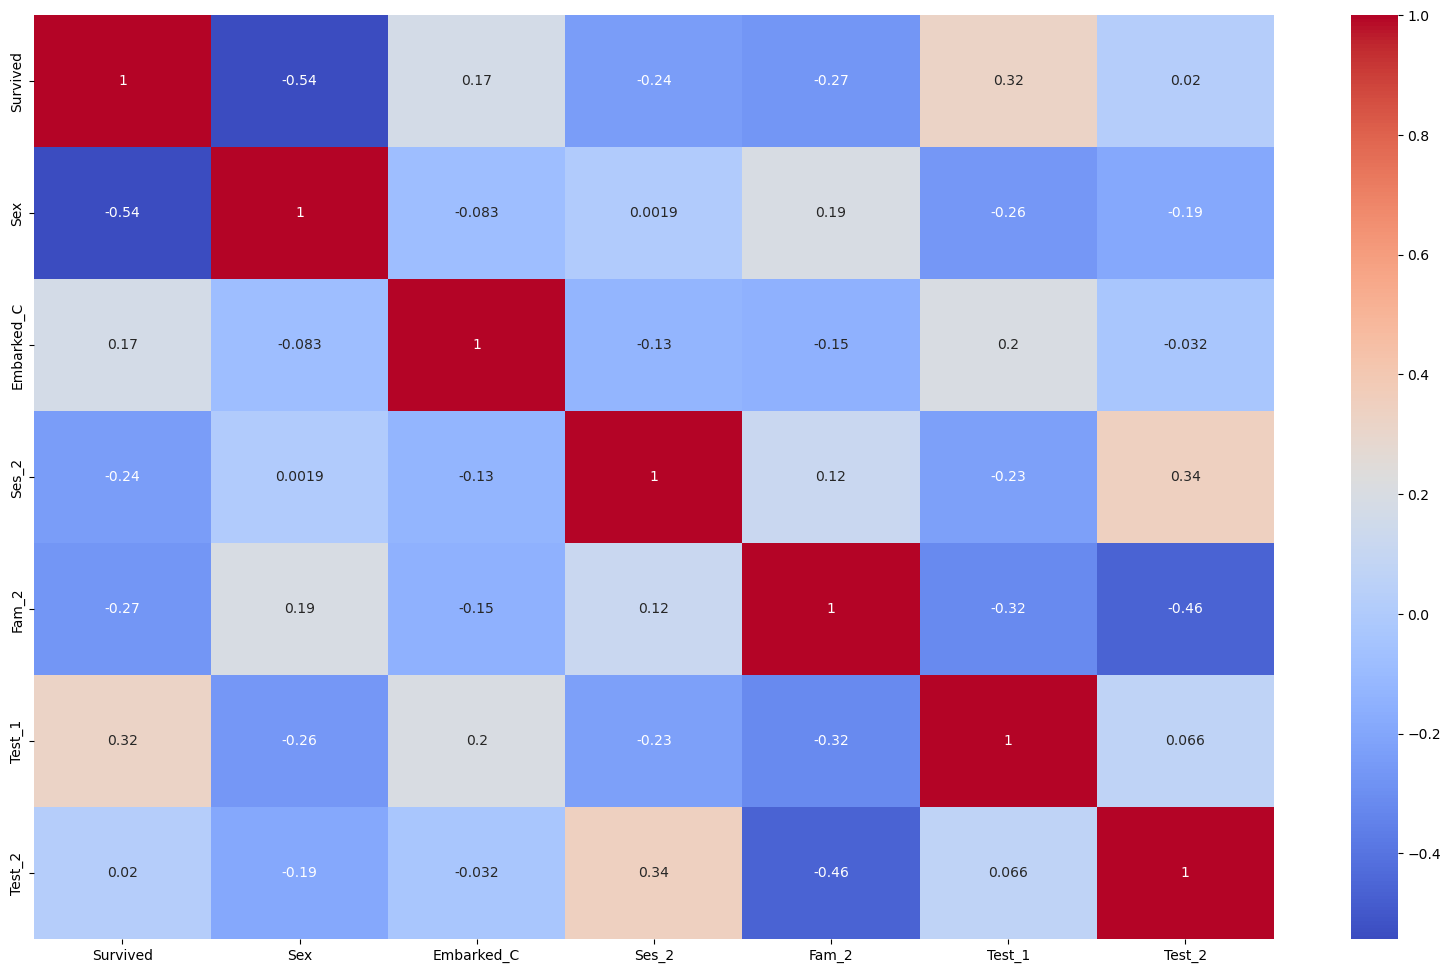

In [6]:
def heatmap(df, figsize=(20, 12), method="spearman"):
    corr_matrix = df.select(
        pl.col(pl.selectors.NUMERIC_DTYPES)
    ).to_pandas().corr(method=method)

    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

heatmap(df)

In [7]:
class LassoClassifierCV:
    def __init__(self, cv=5, c_values=[0.001, 0.01, 0.1, 1, 10], random_state=42):
        self.cv = cv
        self.models = defaultdict(list) 
        self.c_values = c_values
        self.best_estimator = None
        self.random_state = random_state
        self.results = defaultdict(list)
    
    def fit(self, X, y):
        cv = KFold(n_splits=self.cv)
        features=list(X.columns)
        best_score = -1
        
        for c in self.c_values:
            model = LogisticRegression(C=c, penalty="l1", solver="liblinear", random_state=self.random_state)
            for train_indices, test_indices in cv.split(X, y):
                model.fit(X[train_indices], y[train_indices])
                y_pred = model.predict(X[test_indices])
                score = accuracy_score(y_pred=y_pred, y_true=y[test_indices])
                
                self.models[f"model_splits_c{c}"].append(model)
                coefs = model.coef_.flatten()
                for feature, coef in zip(features, coefs):
                    self.results[f"{feature}_c{c}"].append(coef)
                self.results[f"score_splits_c{c}"].append(score)
                if score > best_score:
                    best_score = score
                    self.best_estimator = model

        return self 
    
    def report(self):
        report = pl.DataFrame(self.results)
        report = pl.concat([report, report.mean()], how="vertical")
        return report

    def plot(self):
        return pl.DataFrame(self.results).mean()
        
    def predict(X):
        pass

    def _get_formula():
        pass


In [8]:
thing = LassoClassifierCV(c_values=[0.01, 0.02, 0.05, 0.07, 1])

X, y = df.drop("Survived"), df["Survived"]

model = LassoClassifierCV().fit(X, y)
model.report()

Sex_c0.001,Embarked_C_c0.001,Ses_2_c0.001,Fam_2_c0.001,Test_1_c0.001,Test_2_c0.001,score_splits_c0.001,Sex_c0.01,Embarked_C_c0.01,Ses_2_c0.01,Fam_2_c0.01,Test_1_c0.01,Test_2_c0.01,score_splits_c0.01,Sex_c0.1,Embarked_C_c0.1,Ses_2_c0.1,Fam_2_c0.1,Test_1_c0.1,Test_2_c0.1,score_splits_c0.1,Sex_c1,Embarked_C_c1,Ses_2_c1,Fam_2_c1,Test_1_c1,Test_2_c1,score_splits_c1,Sex_c10,Embarked_C_c10,Ses_2_c10,Fam_2_c10,Test_1_c10,Test_2_c10,score_splits_c10
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.01498,0.0,0.586592,-0.116361,0.0,0.0,0.0,0.020507,0.0,0.597765,-1.922856,0.124973,-0.693252,0.0,0.011229,-0.07251,0.798883,-2.581487,0.455896,-0.812764,-2.749245,0.009775,-0.176497,0.810056,-2.669348,0.494042,-0.827769,-3.238449,0.009656,-0.195698,0.810056
0.0,0.0,0.0,0.0,0.01014,0.0,0.657303,-0.316128,0.0,0.0,0.0,0.013577,0.0,0.668539,-2.060166,0.104924,-0.69329,0.0,0.009048,-0.114613,0.792135,-2.715057,0.340944,-0.80826,-2.837416,0.008482,-0.207754,0.803371,-2.803479,0.365509,-0.824665,-3.315067,0.00843,-0.224977,0.792135
0.0,0.0,0.0,0.0,0.013517,0.0,0.651685,-0.22916,0.0,0.0,0.0,0.018028,0.0,0.662921,-2.025721,0.0,-0.510561,0.0,0.011097,-0.125262,0.769663,-2.662133,0.28716,-0.625266,-2.540943,0.009884,-0.204658,0.792135,-2.746161,0.321128,-0.638204,-3.007264,0.009814,-0.218967,0.792135
0.0,0.0,0.0,0.0,0.010298,0.0,0.713483,-0.330613,0.0,0.0,0.0,0.01317,0.0,0.713483,-2.113387,0.0,-0.516564,0.0,0.008397,-0.07316,0.775281,-2.68546,0.176226,-0.632852,-2.279208,0.008039,-0.139682,0.780899,-2.759798,0.209606,-0.645459,-2.697945,0.008025,-0.150801,0.786517
0.0,0.0,0.0,0.0,0.00921,0.0,0.702247,-0.26442,0.0,0.0,0.0,0.012576,0.0,0.724719,-2.045637,0.0,-0.616681,0.0,0.008419,-0.094671,0.837079,-2.656396,0.155683,-0.744217,-2.530407,0.007814,-0.160936,0.837079,-2.73754,0.180668,-0.760013,-2.963383,0.007748,-0.171995,0.831461
0.0,0.0,0.0,0.0,0.011629,0.0,0.662262,-0.251336,0.0,0.0,0.0,0.015572,0.0,0.673486,-2.033554,0.045979,-0.60607,0.0,0.009638,-0.096043,0.794608,-2.660106,0.283182,-0.724672,-2.587444,0.008799,-0.177906,0.804708,-2.743265,0.314191,-0.739222,-3.044422,0.008735,-0.192488,0.802461
